## **Exploratory Data Analysis anmd Visualization**
## **Splitting a Dataset into Training, Validation and Test Sets**
## **Filling/imputing missing values in numeric columns**
## **Scaling Numeric Features into a (0, 1) range**
## **Encoding Categorical Column as One-Hot Vectors**
## **Training a Logistic Regression Model using Scikit-learn**
## **Evaluating a Model using a Validation Set and Test Set**
## **Saving a model to disk and loading it back**

### **This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.**

### **RainTomorrow is the target variable to predict. It means -- will it be rain the next day, Yes or No?**
### **This column is Yes if the rain for that day was 1mm or more.**

### **As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow**.

In [4]:
import pandas as pd
import numpy as np

In [5]:
weather_df = pd.read_csv("/content/drive/MyDrive/Advertising/Rain/weatherAUS.csv")
weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
weather_df.shape

(145460, 23)

### **Logistic Regression is better suited for classification problems like predicting whether it will rain tomorrow or not. Identifying whether a given problem is a classification or regression problem is an important first step in machine learning.**

## **Classification Problem**
#### **Problem where each input must be assigned a discrete categoky (also called Label or Class)  are known as classification problems. e.g:**
#### **Rainfall Prediction: Predicting whether it will rain tomorrow using today's weather data (Classes are "will rain" and "will not rain")**
#### **Breast Cancer Detection: Predicting whether a tumor is "benign" (non-cancerous) or "malignant" (cancerous) using information like its radius, texture etc**
#### **Loan Repayment Prediction: Predicting whether applicant will repay a home loan based on factors like age, income, loan amount, no of children etc**
#### **Handwritten Digit Recognition: Identifying which digit from 0 - 9 a picture of handwritten text represnts**

### **Classification problems can be binary (Yes or No) or multiclass (picking one of many classes)**

### **Regression Problems:**
### **These are the problems where a continuous numeric value must be predicted for each input. e.g:**
#### **Medical Charges Prediction**
#### **House Price Prediction**
#### **Ocean Tempration Prediction**
#### **Weather Temperation Prediction**

### **Let's check the datatype and see if there are missing values in these columns**

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### **While we should be able to fill-in missing values for most columns, it might be a good idea to discard the rows where the value of RainToday or RainTomorrow is missing to make our analysis and modelling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable)**

In [8]:
weather_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [9]:
weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [10]:
weather_df.shape

(140787, 23)

In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

## **Exploratory Data Analysis and Visualization**
### **Before training a machine learning model, it is always a good idea to explore the distributions of various columns and see how they are related to a target column. Now let's explore and visualize the data using Plotly, Matplotlib, and Seaborn libraries.**

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
px.histogram(weather_df, x='Location', title='Location' + ' vs ' + 'Rainy days', color='RainToday')
# or
px.histogram(weather_df, x='Location', title=f'Location vs Rainy days', color='RainToday')

In [14]:
px.histogram(weather_df,
             x='Temp3pm',
             title='Temperation at 3pm' + ' vs ' + 'Rain Tomorrow',
             color='RainTomorrow')

In [15]:
px.histogram(weather_df,
             x='RainTomorrow',
             title='Rain Tomorrow' + ' vs ' + 'Rain Today',
             color='RainToday')

In [16]:
px.scatter(weather_df.sample(2000),
             x='MinTemp',
             y ='MaxTemp',
             title='Min Temp' + ' vs ' + 'Max Temp',
             color='RainToday')

In [17]:
px.histogram(weather_df.sample(2000),
             x = 'Temp3pm',
              y = 'Humidity3pm',
             title='Temp (3pm)' + ' vs ' + 'Humidity (3pm)',
             color='RainTomorrow')

### **Training, Validation and Test Sets**
#### **While building real-world machine learning models, it is quite common to split the dataset into these 3 parts:**
#### **1.Training Set:-used to train the model.i.e, compute the loss and adjust the model's weight using an optimization technique.**
#### **2.Validation Set:-used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.**
#### **3.Test Set:-used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.**




### **As a general rule of thumb, you can use around 60% of the data for the training set, 20% for validation set, and 20% for test set. If a separate test set is already provided, you can use a 75% - 25% training - validation split.**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_val_df, test_df = train_test_split(weather_df, test_size = 0.2, random_state = 42)
train_df, val_df, = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (84471, 23)
val_df.shape: (28158, 23)
test_df.shape: (28158, 23)


### **However, while working with dates, it is often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.**

### **For the current dataset, we can use the Date column in the dataset to create another column for year. We will pick the last two years for test set, and one year before it for validation set.**

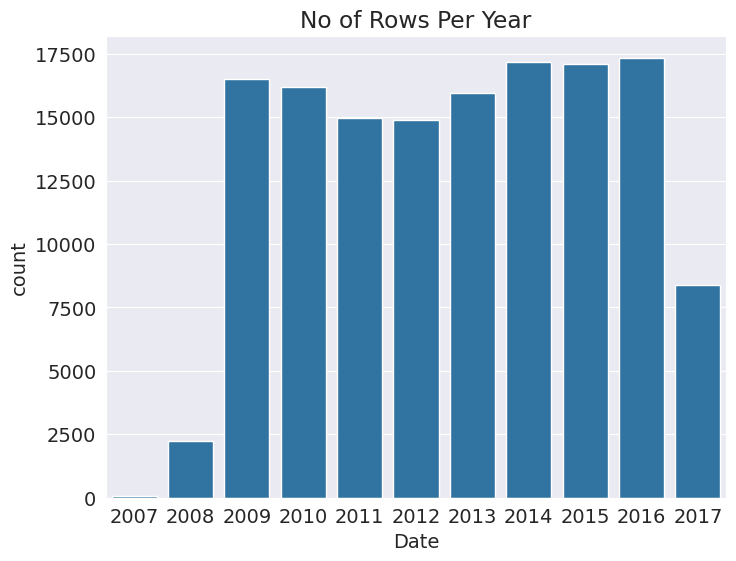

In [20]:
plt.title('No of Rows Per Year')
sns.countplot(x = pd.to_datetime(weather_df.Date).dt.year);

In [21]:
year = pd.to_datetime(weather_df.Date).dt.year

In [22]:
train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (97988, 23)
val_df.shape: (17089, 23)
test_df.shape: (25710, 23)


In [23]:
train_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [24]:
val_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133  2015-01-01   Albury     11.4     33.5       0.0          NaN       NaN   
2134  2015-01-02   Albury     15.5     39.6       0.0          NaN       NaN   
2135  2015-01-03   Albury     17.1     38.3       0.0          NaN       NaN   
2136  2015-01-04   Albury     26.0     33.1       0.0          NaN       NaN   
2137  2015-01-05   Albury     19.0     35.2       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
2133         WSW           30.0        ESE  ...        45.0         14.0   
2134          NE           56.0        ESE  ...        45.0         12.0   
2135         NNE           48.0         NE  ...        35.0         19.0   
2136         NNE           41.0        ESE  ...        46.0         37.0   
2137           E           33.0        SSE  ...        60.0         34.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2133       1013.5       1011.0       NaN       NaN     21.0     32.7   
2134       1016.0       1012.4       NaN       NaN     25.6     38.2   
2135       1017.9       1012.3       NaN       NaN     29.2     37.0   
2136       1013.6       1012.1       8.0       5.0     27.4     30.9   
2137       1017.4       1014.7       8.0       NaN     25.6     32.5   

      RainToday  RainTomorrow  
2133         No            No  
2134         No            No  
2135         No            No  
2136         No            No  
2137         No            No  

[5 rows x 23 columns]

In [25]:
test_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498  2016-01-01   Albury     20.4     37.6       0.0          NaN       NaN   
2499  2016-01-02   Albury     20.9     33.6       0.4          NaN       NaN   
2500  2016-01-03   Albury     18.4     23.1       2.2          NaN       NaN   
2501  2016-01-04   Albury     17.3     23.7      15.6          NaN       NaN   
2502  2016-01-05   Albury     15.5     22.9       6.8          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
2498         ENE           54.0        NaN  ...        46.0         17.0   
2499         SSE           50.0        SSE  ...        54.0         30.0   
2500         ENE           48.0        ESE  ...        62.0         67.0   
2501         SSE           39.0         SE  ...        74.0         65.0   
2502         ENE           31.0         SE  ...        92.0         63.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2498       1013.4       1009.2       7.0       3.0     26.1     36.7   
2499       1011.1       1008.4       8.0       8.0     24.8     31.7   
2500       1014.0       1014.8       8.0       8.0     21.8     19.5   
2501       1017.9       1016.5       8.0       8.0     19.2     21.6   
2502       1016.3       1013.9       8.0       8.0     17.2     22.2   

      RainToday  RainTomorrow  
2498         No            No  
2499         No           Yes  
2500        Yes           Yes  
2501        Yes           Yes  
2502        Yes            No  

[5 rows x 23 columns]

## **Identifying Inputs and target columns:**
#### **In the current dataset, we can ignore Date column since we only need weather conditions to predict whether it will rain the next day**

In [26]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [27]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


### **We can now create the inputs and targets for the training set, validation set and test set for further processing and model training.**

In [28]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [29]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [30]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [31]:
train_inputs.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          W        WNW  ...          24.0         71.0   
1           44.0        NNW        WSW  ...          22.0         44.0   
2           46.0          W        WSW  ...          26.0         38.0   
3           24.0         SE          E  ...           9.0         45.0   
4           41.0        ENE         NW  ...          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   
4         33.0       1010.8       1006.0       7.0       8.0     17.8   

   Temp3pm  RainToday  
0     21.8         No  
1     24.3         No  
2     23.2         No  
3     26.5         No  
4     29.7         No  

[5 rows x 21 columns]

In [32]:
train_targets.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

### **Let's also identify which of the columns are numerical, and which ones are categorical. We need to convert categorical data to numbers (0s & 1s) for training a logistic regression model.**

In [33]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [34]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

### **Let's view some statistics for numerical columns**

In [35]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [36]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### **Imputing Missing Numeric Data**
#### **The process of filling missing values is called imputation**

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

### **Before we perform imputation, let's check the number of missing values in each numeric column**

In [38]:
weather_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

### **These values are spread across the training, validation, and test sets. You can also check the number of missing values individually for train_inputs, val_inputs and test_inputs**

In [39]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

### **The first step in imputation is to fit the imputer into the data. i.e compute the chosen statistic (e.g mean) for each column in the dataset**

In [40]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

### **Afer calling fit, the computed statistic for each column is stored in the statistics_property of imputer**

In [41]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

### **The missing values in the training, validation and test sets can now be filled in using the transform method of imputer**

In [42]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

### **The missing values are now filled in with the mean of each column**

In [43]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [44]:
val_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [45]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### **Scaling Numeric Features**
#### **Another good practice is to scale numeric features to a small range of values e.g, (0, 1) or (-1, 1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller number.**

In [46]:
weather_df[numeric_cols].describe().head()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000

### **Let's use MinMaxScaler from sklearn.preprocessing to scale values to the (0, 1) range.**

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

### **First we fit the scaler to the data. i.e, compute the range of values for each numeric column.**

In [49]:
scaler.fit(weather_df[numeric_cols])

MinMaxScaler()

### **We can now inspect the minimum and maximum values in each column**

In [50]:
print('minimum:')
list(scaler.data_min_)

minimum:


[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [51]:
print('maximum:')
list(scaler.data_max_)

maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

### **We can now separately scale the training, validation and test sets using the transform method of scaler**

In [52]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### **We can now verify that values in each column lie in the range (0, 1)**

In [53]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

## **Encoding Categorical Data**
### **Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.**

### **One-hot encoding involves adding a new binary (0/1) column for each unique category of categorical column.**

In [54]:
weather_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### **We can now perform one-hot encoding using the OneHotEncoder class from sklearn.preprocessing.**

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

In [57]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

### **First, we fit the encoder to the data. i.e, identify the full list of categories across all categorical columns**

In [58]:
encoder.fit(weather_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### **The encoder has created a list of categories for each of the categorical columns in the dataset.**
### **We can now generate column names for each individual category using get_feature_names**

In [59]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

### **All of the above columns will be added to train_inputs, val_inputs and test_inputs.**
### **To perform the encoding, we use the transform method of encoder**

In [60]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-60-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-60-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-60-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-60-8950d7c1751d>:1: PerformanceWarning:

Da

### **We can now verify that these new columns have been added to our training, validation and test sets**

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
test_inputs.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498   Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499   Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500   Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501   Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502   Albury  0.566038  0.523629  0.018329     0.037741  0.526244   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498         ENE       0.372093    Unknown        ESE      0.000000   
2499         SSE       0.341085        SSE         SE      0.069231   
2500         ENE       0.325581        ESE        ENE      0.084615   
2501         SSE       0.255814         SE        SSE      0.069231   
2502         ENE       0.193798         SE        SSE      0.046154   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498      0.080460         0.46         0.17     0.543802       0.5136   
2499      0.195402         0.54         0.30     0.505785       0.5008   
2500      0.448276         0.62         0.67     0.553719       0.6032   
2501      0.195402         0.74         0.65     0.618182       0.6304   
2502      0.103448         0.92         0.63     0.591736       0.5888   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498  0.777778  0.333333  0.702532  0.808061        No                0.0   
2499  0.888889  0.888889  0.675105  0.712092        No                0.0   
2500  0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501  0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502  0.888889  0.888889  0.514768  0.529750       Yes                0.0   

      Location_Albany  Location_Albury  Location_AliceSprings  \
2498              0.0              1.0                    0.0   
2499              0.0              1.0                    0.0   
2500              0.0              1.0                    0.0   
2501              0.0              1.0                    0.0   
2502              0.0              1.0                    0.0   

      Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2498                     0.0                0.0               0.0   
2499                     0.0                0.0               0.0   
2500                     0.0                0.0               0.0   
2501                     0.0                0.0               0.0   
2502                     0.0                0.0               0.0   

      Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
2498                0.0              0.0                0.0             0.0   
2499                0.0              0.0                0.0             0.0   
2500                0.0              0.0                0.0             0.0   
2501                0.0              0.0                0.0             0.0   
2502                0.0              0.0                0.0             0.0   

      Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
2498                    0.0                0.0              0.0   
2499                    0.0                0.0              0.0   
2500                    0.0                0.0              0.0   
2501                    0.0                0.0              0.0   
2502                    0.0                0.0              0.0   

      Location_GoldCoast  Location_Hobart  Location_Katherine  \
2498                 0.0              0.0                 0.0   
2499                 0.0              0.0                 0.0   
2500                 0.0              0.0                 0.0   
2501                 0.0              0.0                 0.0   
2502                 0.0              0.0                 0.0   

      Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
2498                  0.0                 0.0                        0.0   
2499                  

### **Saving Processed Data to Disk using parquet format which is a fast and efficient format for saving and loading Pandas DataFrames**

In [63]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [64]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [65]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

### **We can read the data back using pd.read_parquet**

In [66]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

In [67]:
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

### **Let's verify that the data was loaded properly**

In [68]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [69]:
val_inputs.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133   Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134   Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135   Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136   Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137   Albury  0.648585  0.756144       0.0     0.037741  0.526244   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133         WSW       0.186047        ESE          W      0.053846   
2134          NE       0.387597        ESE        ESE      0.069231   
2135         NNE       0.325581         NE          N      0.153846   
2136         NNE       0.271318        ESE          W      0.053846   
2137           E       0.209302        SSE         SE      0.053846   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133      0.126437         0.45         0.14     0.545455       0.5424   
2134      0.103448         0.45         0.12     0.586777       0.5648   
2135      0.229885         0.35         0.19     0.618182       0.5632   
2136      0.080460         0.46         0.37     0.547107       0.5600   
2137      0.103448         0.60         0.34     0.609917       0.6016   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2133  0.492351  0.499917  0.594937  0.731286        No                0.0   
2134  0.492351  0.499917  0.691983  0.836852        No                0.0   
2135  0.492351  0.499917  0.767932  0.813820        No                0.0   
2136  0.888889  0.555556  0.729958  0.696737        No                0.0   
2137  0.888889  0.499917  0.691983  0.727447        No                0.0   

      Location_Albany  Location_Albury  Location_AliceSprings  \
2133              0.0              1.0                    0.0   
2134              0.0              1.0                    0.0   
2135              0.0              1.0                    0.0   
2136              0.0              1.0                    0.0   
2137              0.0              1.0                    0.0   

      Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2133                     0.0                0.0               0.0   
2134                     0.0                0.0               0.0   
2135                     0.0                0.0               0.0   
2136                     0.0                0.0               0.0   
2137                     0.0                0.0               0.0   

      Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
2133                0.0              0.0                0.0             0.0   
2134                0.0              0.0                0.0             0.0   
2135                0.0              0.0                0.0             0.0   
2136                0.0              0.0                0.0             0.0   
2137                0.0              0.0                0.0             0.0   

      Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
2133                    0.0                0.0              0.0   
2134                    0.0                0.0              0.0   
2135                    0.0                0.0              0.0   
2136                    0.0                0.0              0.0   
2137                    0.0                0.0              0.0   

      Location_GoldCoast  Location_Hobart  Location_Katherine  \
2133                 0.0              0.0                 0.0   
2134                 0.0              0.0                 0.0   
2135                 0.0              0.0                 0.0   
2136                 0.0              0.0                 0.0   
2137                 0.0              0.0                 0.0   

      Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
2133                  0.0                 0.0                        0.0   
2134                  

In [70]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

## **Training a Logistic Regression Model**
### **Logistic Regression is a common technique for solving binary classification problems.**

### **To train a Logistic Regression model, we use LogisticRegression model from sklearn**

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(solver = 'liblinear')

### **We can train the model using model.fit**

In [73]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

### **model.fit uses the following workflow for training the model:**
### **1.We initialize a model with random parameters (weights and biases)**
### **2.We pass some inputs into the model to obtain predictions**
### **3.We compare the model's predictions with the actual targets using the loss function.**
### **4.We use an optimization technique (like least squares, gradient descent etc) to reduce the loss by adjusting the weights and biases of the model.**
### **5.We repeat steps 1 to 4 till the predictions from the model are good enough**


### **Now let's check the "weights" and "biases" of the trained model**

In [74]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [75]:
print(model.coef_.tolist())

[[0.8941494819914398, -2.8835981637598285, 3.16705385571896, 0.8748813625212737, -1.6712299421013947, 6.767350229914935, -0.9348274497098934, -1.4305423144580125, 0.32169035571609356, 5.998310719348589, 5.479442680901137, -9.193081641325355, -0.1617248603539462, 1.2877526299030033, 0.47427919277414954, 2.0306485635715577, 0.6006296229747108, -0.5482290695469623, 0.47582713818585737, 0.005403329094420832, 0.3448876907966021, -0.3541939045192693, 0.17792147945281966, 0.4398188899108637, -0.01537127061274263, 0.027474693408753546, 0.25694232549913004, -0.0218819867279193, -0.044852542203540485, -0.4845267257789648, -0.13899063231311373, -0.5770420446571881, -0.7889757132822478, -0.25772682848771616, -0.33014715004120004, -0.5704349639635146, 0.08010303171771241, 0.010434612808275893, 0.06303065657435758, -0.9041914913596089, -0.44254300410647857, 0.0036144590326460013, -0.46233657140847095, -0.4666993679113447, -0.0706491168142918, 0.1899331278715225, 0.4487399252051554, 0.606893959113903

In [76]:
print(model.intercept_)

[-2.51736667]


### **Each weight is applied to the value in a specific column of the input. The higher the weight, the greater the impact of the column on the prediction.**

In [77]:
pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

feature    weight
0           MinTemp  0.894149
1           MaxTemp -2.883598
2          Rainfall  3.167054
3       Evaporation  0.874881
4          Sunshine -1.671230
..              ...       ...
113  WindDir3pm_WNW -0.101641
114  WindDir3pm_WSW -0.344135
115  WindDir3pm_nan  0.000000
116    RainToday_No -1.507543
117   RainToday_Yes -1.009824

[118 rows x 2 columns]

<Axes: xlabel='weight', ylabel='feature'>

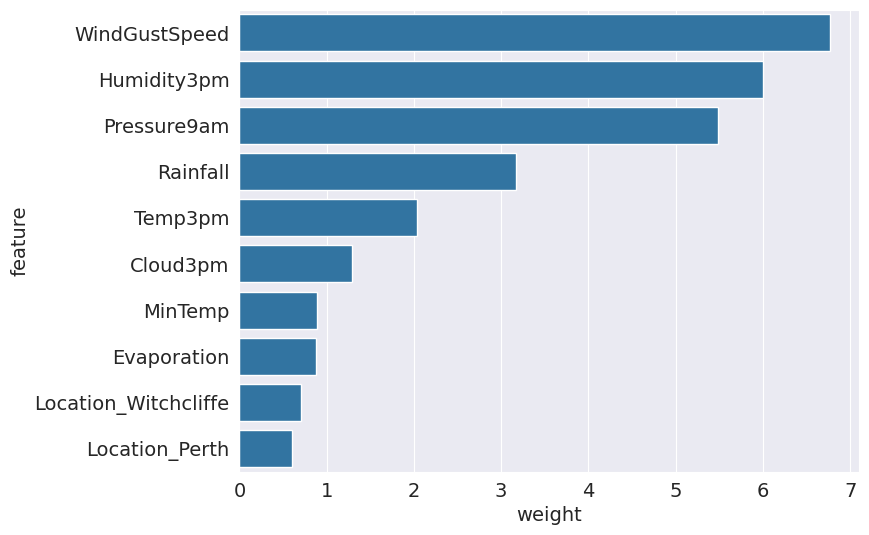

In [78]:
weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x= 'weight', y = 'feature')

### **Making Predictions and Evaluating the Model**

#### **We can now use the trained model to make perdictions on the training, validation and test sets.**

In [79]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [80]:
train_preds = model.predict(X_train)

In [81]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [82]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

### **We can output a probabilistic prediction using predict_proba**

In [83]:
train_probs = model.predict_proba(X_train)

In [84]:
train_probs

array([[0.94410402, 0.05589598],
       [0.94077867, 0.05922133],
       [0.96099488, 0.03900512],
       ...,
       [0.98747367, 0.01252633],
       [0.98331684, 0.01668316],
       [0.87429661, 0.12570339]])

### **The numbers above indicate the probabilities for the target classes "No" and "Yes"**

In [85]:
model.classes_

array(['No', 'Yes'], dtype=object)

### **We can test the accuracy of the model's predictions by computing the percentage of matching values in "train_preds" and "train_targets"**
### **This can be done using accuracy_score() from sklearn.metrics**

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(train_targets, train_preds)

0.8519716700004082

### **The model achieved an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix**

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

### **Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given set of inputs**

In [90]:
def predict_and_plot(inputs, targets, name = ''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets, preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrx'.format(name));

  return preds

Accuracy: 85.20%


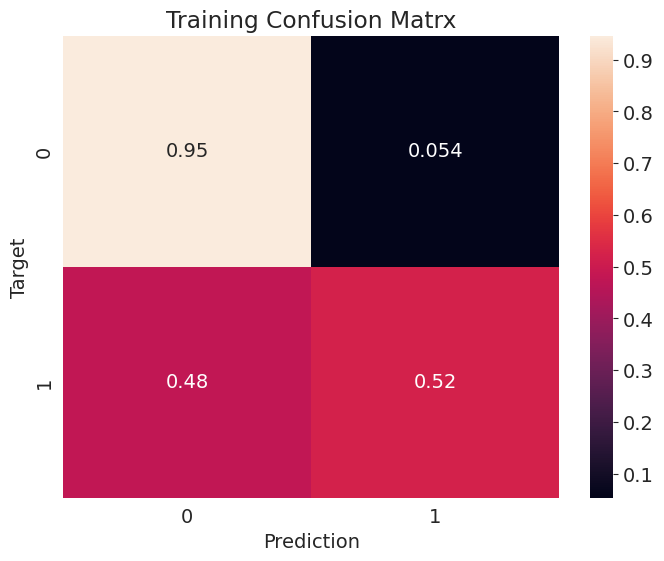

In [91]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

### **Let's compute the model's accuracy on the validation and test sets too.**

Accuracy: 85.41%


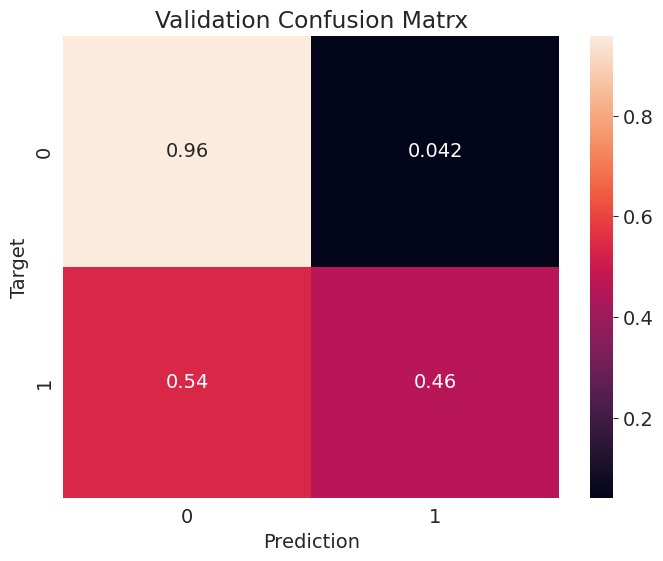

In [92]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 84.20%


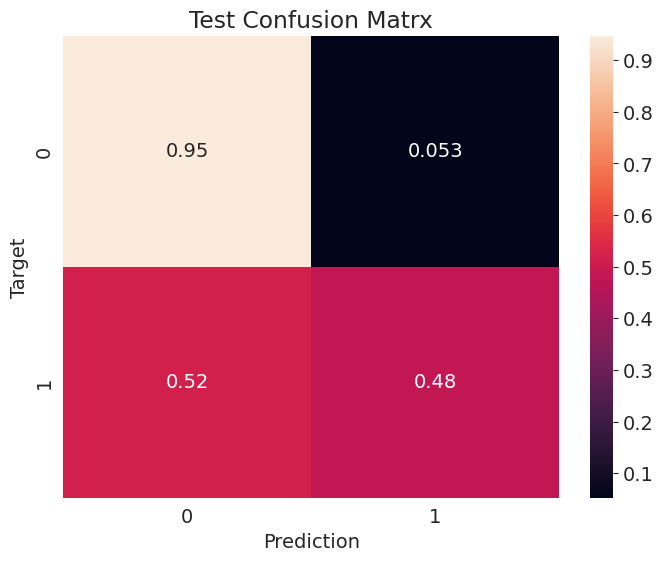

In [93]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

### **The accuracy of the model on the validation and test sets are above 84%, which suggests that our model generalizes well to data it hasn't seen before.**
### **But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learnt something useful is to compare its results to a "random" or "dumb" model.**
### **Let's create two models: One that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.**

In [94]:
def random_guess(inputs):
  return np.random.choice(["No", "Yess"], len(inputs))

In [95]:
def all_no(inputs):
  return np.full(len(inputs), "No")

### **Let's check the accuracies of these two models on test set**

In [96]:
accuracy_score(test_targets, random_guess(X_test))

0.3853364449630494

In [97]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

### **Thankfully, our model is better than "dumb" or "random" models. It is a good practice to always benchmark any model you train against such baseline models**

### **Making Predictions on a Single Inputs**

#### **Once the model been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from Katherine weather department today**

In [98]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

### **The first is to convert the dictionary a Pandas DataFrame, similar to weather_df. This can be done by passing a list containing the given dictionary to the pd.DataFrame constructor.**

In [99]:
new_input_df = pd.DataFrame([new_input])

In [100]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

### **We have now created a pandas dataframe with the same columns as weather_df (except RainTomorrow, which needs to be predicted). The dataframe contains just one row of data, containing the given input.**

### **We must now apply the same transformations applied while training the model.**

### **1.Imputation of missing values using the "imputer" created earlier**
### **2.Scaling numerical features using the "scaler" created earlier**
### **3.Encoding categorical features using the "encoder" created earlier**

In [101]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

<ipython-input-101-1e64a48fb6dc>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-101-1e64a48fb6dc>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-101-1e64a48fb6dc>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-101-1e64a48fb6dc>:3: PerformanceWarning:

In [102]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0           

### **We can now make a prediction using model.predict**

In [103]:
prediction = model.predict(X_new_input)[0]

In [104]:
prediction

'Yes'

### **Our model predicts that it will rain tomorrow in Katherine. We can also check the probability of the prediction**

In [105]:
prob = model.predict_proba(X_new_input)[0]

In [106]:
prob

array([0.48096553, 0.51903447])

### **Let's define a helper function to make predictions for individual inputs, because our model is not too confident about its prediction**

In [107]:
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
  return pred, prob

### **We can now use this functions to make predictions for individual inputs**

In [108]:
weather_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [109]:
new_input = {'Date': '2021-06-19',
             'Location': 'Albury',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [110]:
predict_input(new_input)

<ipython-input-107-ba06f0746dbb>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-107-ba06f0746dbb>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-107-ba06f0746dbb>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-107-ba06f0746dbb>:5: PerformanceWarning:

('Yes', np.float64(1.0))

### **Saving and Loading Trained Models:**
#### **We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it is also important to imputers,scalers and encoders, and even column names.**
#### **We can use joblib module to save and load python object on the disk.**

In [111]:
import joblib

### **Let's first create a dictionary containing all the required objects:**

In [112]:
australia_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

### **We can now save this to a file using joblib.dump**

In [113]:
joblib.dump(australia_rain, 'australia_rain.joblib')

['australia_rain.joblib']

### **The object can be loaded back using joblib.load**

In [114]:
australia_rain2 = joblib.load('australia_rain.joblib')

In [115]:
australia_rain2['model']

LogisticRegression(solver='liblinear')

### **Let's use the loaded model to make predictions on the original test set**

In [116]:
test_preds2 = australia_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.842045896538312

### **As expected we get the same result as original model**